# What can we learn about the Climate from Global Average Surface Temperature?
In this session we'll investigate the global average of surface temperature to start learning about Earth's climate system.

## Review Assignments

We'll always try to set aside the first 15-20 minutes of time together to review the work everyone has done outside of class.

[space for notes on student's work]

## Earth's Global Average Surface Temperature, a key climate indicator (1850-2023)
The average temperature of the surface of the Earth is a powerful tool for quantifying Earth's climate and has profound impacts on human, biological, and physical systems. So what sets the mean surface temperature of the Earth?

Let's start by looking at [a record of Earth's average surface temperature](https://berkeleyearth.org/data/) to see what the recent climate has looked like.

In [1]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [2]:
# load data
fname_in = '../data/GAST_BerkeleyEarth_1850-2023.csv'
gast = pd.read_csv(fname_in)

In [3]:
gast

,Year,Month,Monthly Average,Monthly Anomaly Uncertainty
0,1850,1,11.440,0.404
1,1850,2,12.197,0.524
2,1850,3,12.666,0.449
3,1850,4,13.345,0.304
4,1850,5,14.288,0.249
...,...,...,...,...
2083,2023,8,17.092,0.047
2084,2023,9,16.736,0.040
2085,2023,10,15.644,0.046
2086,2023,11,14.642,0.050


We'll add a datetime column to make using Pandas a little easier

In [4]:
gast['Time'] = pd.to_datetime(gast[['Year','Month']].assign(Day=1))

In [5]:
df = gast.set_index('Time')[['Monthly Average','Monthly Anomaly Uncertainty']]

In [6]:
df

,Monthly Average,Monthly Anomaly Uncertainty
Time,,
1850-01-01,11.440,0.404
1850-02-01,12.197,0.524
1850-03-01,12.666,0.449
1850-04-01,13.345,0.304
1850-05-01,14.288,0.249
...,...,...
2023-08-01,17.092,0.047
2023-09-01,16.736,0.040
2023-10-01,15.644,0.046


The dataframe `df` now holds the **time series** of monthly averaged global average surface temperature of Earth. A **time series** is a series of values of a quantity obtained at successive times, often with equal intervals between them.

For data that was sampled evenly in time, we can describe how frequently a sample was made by the number of point over a given period of time. In our example there is one data point for each month, so we'd say the GAST is at monthly frequency.

**Plot the time series of the monthly averaged global average surface temperature of Earth.**

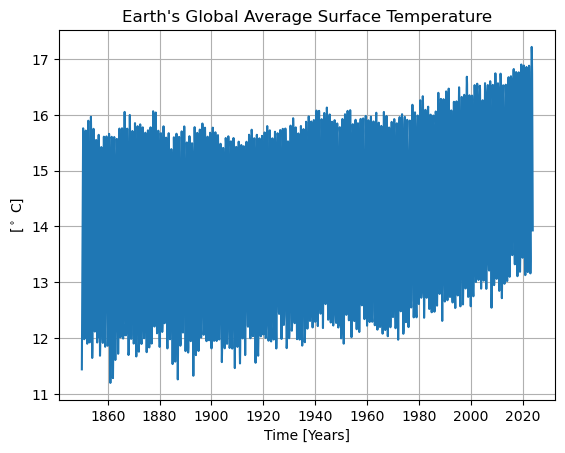

In [7]:
# plot the monthly average gast
plt.plot(df.index,df['Monthly Average'])
plt.ylabel(r'[$^\circ$ C]')
plt.xlabel('Time [Years]')
plt.title('Earth\'s Global Average Surface Temperature')
plt.grid()
plt.show()

What do you notice?

* It looks like a blob
* Temperature looks lower in the 1850-1860 but starts to increase in the 1900's

Why does looking at the record like a blob? Let's start by zooming in on only a small portion of the line plot to see what's going on.

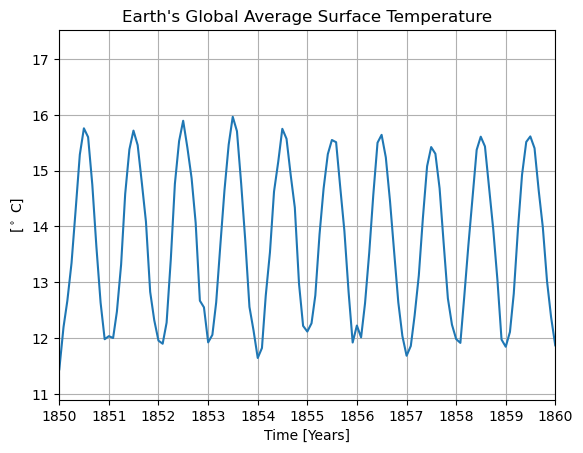

In [8]:
# zoomed in plot the monthly average gast
plt.plot(df.index,df['Monthly Average'])
plt.ylabel(r'[$^\circ$ C]')
plt.xlabel('Time [Years]')
plt.title('Earth\'s Global Average Surface Temperature')
plt.xlim([datetime.date(1850,1,1), datetime.date(1860, 1, 1)])
plt.grid()
plt.show()

Now we can see that the blob is really a single line that goes up and down every year. That up and down cycling is a natural process and we refer to that as a seasonal cycle.

What do you notice about the seasonal cycle in this time series?

[notes on your observations here]

## [Taking Averages](https://earth-env-data-science.github.io/lectures/pandas/pandas_groupby.html#time-grouping)
Averaging data allows us to take complex signals and reduce the information into something more digestable. There are all sorts of way to take averages, here will look at **rolling averages** and **grouped averages**.

### Rolling Average
A rolling average is a calculation to analyze data points by creating a series of averages of different selections of the full data set. It is a way of smoothing a signal so the background variations are easier to see rather than the short time variations (some times called the noise).

Let's look at the full GAST with the rolling average plotted on top. Here we'll tell pandas that we want the rolling average to be of 12 data points and to place the average at the center of the 12 selected points. For this monthly dataset, that means each point in the rolling average is a year's worth of data.

In [9]:
# plot the monthly average gast with rolling average

In [10]:
# plot the monthly average gast with rolling average and zooming in

### Grouped Averages
A grouped averaged is where you breakup data set into groups and take the average of each group and the respective indecies, here time, of the group. This chages the frequency of the data set.

For this example we want to go from GAST at monthly frequency down to yearly or annual frequency, so we want to group our data into years, where we take the average of all the data points in a given year. Pandas has two ways to do that, and we'll look at both. The first is with the function `resample`.

In [11]:
# plot the monthly average gast with annual average with resample

In [12]:
# plot the monthly average gast with annual average with resample and zoom

The advantage of using resample here is that is preserves the index as a datetime object.

The other function for grouped averages is `groupby`. `groupby` is very flexible, but doesn't preserve the index as a datetime object. This makes plotting the averaged data with the original a little more tricky but can be worked around. Let's see what that looks like though.

## Assignment

I've added a second data set to the data folder. It's just like the global average surface temperature, but it **only** includes the surface temperature on land in the average and extends back to 1750!

Visualize, in your own way, **both** global average surface temperature time series, land only and full globe, to see how the Earth's climate has evolved over the 1750-2023 time period. Remember that climate refers to a long-term average, usually over 30 years in length. You may chose to do this with line plots, histograms, bar charts. You may chose to make annual averages of each time series first or use the monthly averages dataset, or both. Add notes about why you chose your particular visualization. What differences do you see in the two data sets? What might cause these difference? Include your ideas and questions in your notes.

In [13]:
# path and file name for the land only version of GAST
fname_land_only_gast = '../data/.csv'